# 시계열 데이터 이상치
### 이상치 용어
데이터 집합에서 다른 관측치들과 동덜어진 값을 의미. 이상치 탐지는 데이터 분석과 모델링에서 매우 중요한 역할을 한다. 이상치를 식별하고 처리함으로써 다음과 같은 이점을 얻을 수 있다.
- 데이터 품질 향상
- 모델 정확성 향상
- 이상 패턴 감지
- 비즈니스 응용
- 데이터 이상치의 원인 분석

## 이동 평균과 이동 표준 편차를 사용한 이상치 탐지
데이터의 이동 평균과 이동 표준편차를 계산하여 데이터 포인트가 이동 평균과 일정한 거리 이상 떨어져 있는지 확인하는 것. 이상치는 이동 평균과 일정한 거리 이상 떨어져 있는 값으로 간주될 수 있다.
- 이동 평규 계산 : 이동 평균은 데이터 포인트의 이전 N개 포인트의 평균이다. 이동 평균을 계산하여 데이터의 전반적인 추세를 파악한다.
- 이동 표준편차 계산 : 이동 표준편차는 데이터 포인트의 이전 N개 포인트의 표준편차이다. 이동 표준편차는 데이터의 변동성을 파악한다.

해당 방법을 사용한 이상치 탐지
- 임계값 설정 : 이동 평균에 일정한 배수를 곱한 값과 이동 표준편차에 일정한 배수를 더한 값으로 임계값을 설정한다.
- 이상치 탐지 : 이동 평균과 일정한 거리 이상 떨어진 데이터 포인트를 이상치로 간주할 수 있다.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})

# 이동 평균과 이동 표준편차 계산
window_size = 7
# 일반적으로 일주일(7일) 주기로 이동 평균과 이동 표준편차를 계산하기 위해
# 더 짧은 윈도우 크기를 선택하면 더 작은 주기의 변동성을 관찰할 수 있지만, 노이즈에 민감해질 수 있다.
# 반대로 길게 선택하면 더 큰 주기의 변동성을 파악할 수 있지만 변동성의 신속한 변화를 놓칠 수 있다.
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()
print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.520013
7      0.558687
8      0.511372
9      0.496353
10     0.212575
11     0.179493
12     0.247507
13    -0.251421
14    -0.607471
15    -0.620730
16    -0.842929
17    -0.731834
18    -0.795019
19    -1.031342
20    -0.548638
21    -0.334475
22    -0.244502
23    -0.303347
24    -0.426008
25    -0.280444
26    -0.243114
27    -0.398822
28    -0.452373
29    -0.503691
30    -0.386114
31    -0.043733
32    -0.061508
33    -0.048182
34     0.015654
35    -0.072947
36    -0.001439
37    -0.195434
38    -0.649786
39    -0.619734
40    -0.363138
41    -0.456163
42    -0.298278
43    -0.371130
44    -0.302395
45    -0.215489
46    -0.309417
47    -0.263895
48    -0.239288
49    -0.474630
50    -0.385317
51    -0.229112
52    -0.222980
53    -0.069792
54    -0.073524
55     0.010428
56     0.142403
57     0.051932
58     0.154267
59     0.390334
60     0.234498
61     0.060689
62    -0

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      3.306951
7      3.350924
8      3.360051
9      3.343146
10     2.987788
11     2.981428
12     3.028429
13     2.644133
14     2.310663
15     2.295747
16     1.920231
17     2.144057
18     2.074406
19     1.726963
20     2.552595
21     2.638136
22     2.732644
23     2.738070
24     2.580524
25     2.718412
26     2.710237
27     2.277766
28     2.223069
29     2.138495
30     2.120330
31     2.931261
32     2.911329
33     2.907736
34     3.018370
35     3.016915
36     3.088100
37     3.116910
38     2.348416
39     2.403664
40     2.753110
41     2.568152
42     2.672293
43     2.573831
44     2.516904
45     2.502918
46     2.388789
47     2.519242
48     2.562294
49     2.506359
50     2.641492
51     2.680112
52     2.682520
53     2.878495
54     2.869626
55     3.020666
56     2.914658
57     2.836355
58     2.918647
59     3.109035
60     3.012984
61     2.763884
62     2

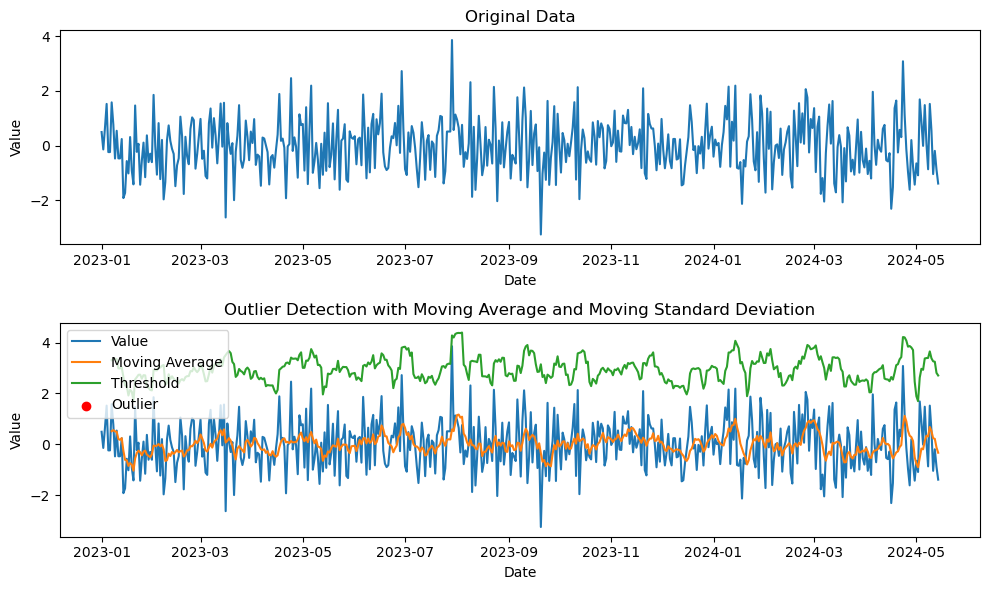

In [4]:
# 임계값 설정
threshold_multiplier = 2  # 임계값 배수
data['Threshold'] = data['MovingAverage'] + threshold_multiplier + data['MovingStd']
print(data['Threshold'])

# 이상치 탐지
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])
# 임계값을 초과하는 경우 True(이상치)로 설정


# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()

- 원본 데이터 그래프 : 날짜에 따른 시계열 데이터의 값이 표시되어 있다. 전반적인 추이와 변동성 파악 가능
- 이동 평균 그래프 : 주어진 창 크기에 대해 데이터의 평균을 계산한 값. 이동 평균은 원본 데이터의 변동성을 완화시키고, 장기적인 추세를 파악할 수 있다. 그래프 상에서 이동 평균은 부드러운 곡선으로 표시된다.
- 임계값 그래프 : 이동 평균에 임계값 배수를 곱한 값을 나타낸다. 이 임계값은 이동 평균과 이동 표준편차를 기반으로 설정되며, 이상치를 탐지하기 위한 기준값으로 사용됨. 그래프 상에서 임계값은 이동 평균 위에 선으로 표시된다.
- 이상치 그래프 : 원본 데이터에서 임계값을 초과하는 값을 가지는 데이터 포인트를 나타낸다. 이상치는 빨간색으로 표시되어 있으며, 이상치로 판단된 데이터 포인트는 원본 데이터 그래프 상에서 튀어나온 형태로 나타난다.

## 지수 평활법을 활용한 이상치 탐지 실습

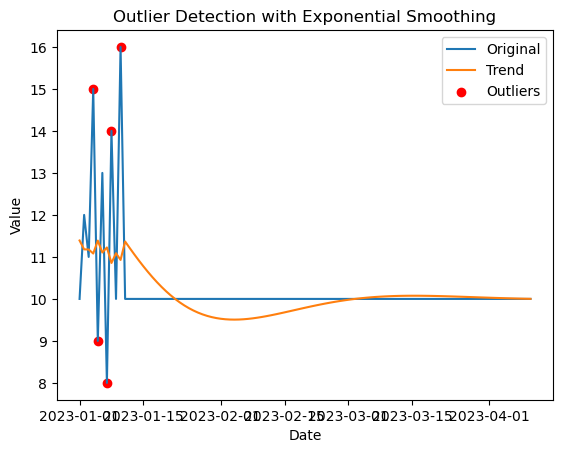

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] + [10] * 90  # 이상치 포함된 데이터

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})

# 지수 평활법 모델 학습
model = ExponentialSmoothing(data['Value'], trend='add')
model_fit = model.fit()

# 추세 계산
trend = model_fit.predict(start = 0, end = len(data['Value'])-1)
# 학습된 모델을 사용하여 데이터의 추세 계산.end = len(data['Value'])-1는 데이터의 전체 기간 의미

# 추세에서의 편차 계산
deviation = data['Value'] - trend

# 지수 평활법 모델 학습
model = ExponentialSmoothing(data['Value'], trend = 'add')
# trend = 'add'는 지수 평활법 모델에서 추세를 가지는 모델을 설정하는 매개변수
model_fit = model.fit()

# 이상치 탐지
threshold = 2 # 이상치 임계값 설정
outliers = abs(deviation) > threshold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.show()

지수 평활법은 시계열 데이터의 추세, 계절성 및 불규칙성 요소를 분리하여 예측하는데 사용되는 방법이다. 추세 요소는 데이터의 장기적인 증가 또는 감소 패턴을 나타내며, trend 매개변수를 통해 이를 설정한다.<br>
trend = 'add' 외에도 trend = 'mul'과 같이 설정할 수 있다. 이는 추세가 시간에 비례하여 일정한 비율로 증가 또는 감소하는 것으로 가정한다. 데이터의 추세가 지속적으로 변화하는 경우에 적합하다. 추세를 설정하는 방법은 데이터의 특성과 도메인에 따라 달라질 수 있으며, 적절한 추세 모델을 선택하는 것이 중요하다.

## Z-점수 기반 이상치 탐지 실습
데이터의 평균과 표준편차를 활용하여 이상치를 탐지하는 기법. 주어진 데이터 포인트가 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 나타내는 z-점수를 계산하고, 이를 기준으로 이상치를 판단한다.<br>
z-점수가 임계값보다 크면 해당 데이터 포인트를 이상치로 간주한다. 일반적으로 임계값은 2 이상으로 설정되며, z-점수가 임계값을 초과하는 데이터 포인트는 이상치로 판단된다<br>
정규분포를 따르는 가정을 전제로 하기 때문에, 데이터의 분포가 다른 경우 제대로 작동하지 않을 수 있다.

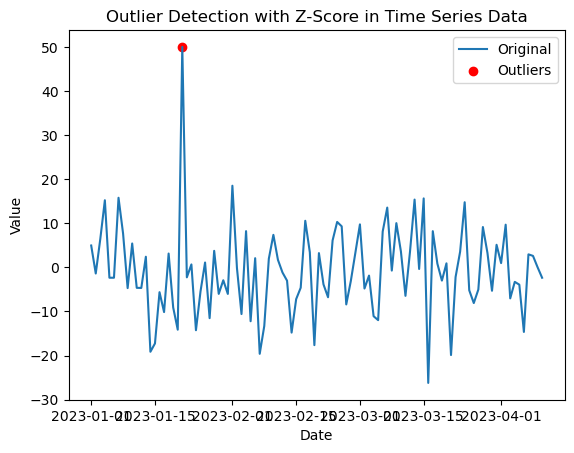

Detected Outliers : 
20    50.0
Name: Value, dtype: float64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10

# 이상치 추가
values[20] = 50  # 이상치 추가

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})

# 이상치 탐지
z_scores = np.abs(stats.zscore(data['Value']))   # z-score 계산
threshold = 3 # 이상치 임계값 설정
outliers = z_scores > threshold # Z-scores가 임계값을 초과하는지 확인

# 이상치 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력
outlier_values = data[outliers]['Value']
print("Detected Outliers : ")
print(outlier_values)

## Smoothing 실습
시계열 데이터에서 잡음이나 불규칙한 변동을 완화시키는 기법<br>
데이터의 추세나 패턴을 부드럽게 만들어주는 과정. 이동평균이나 지수평활법과 같은 방법을 사용하여 데이터의 변동을 완화시킨다.

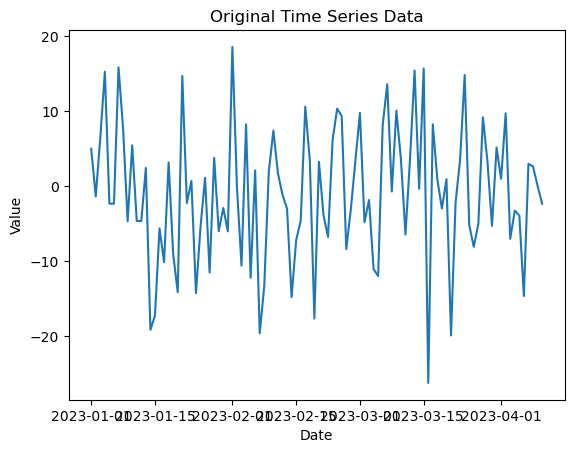

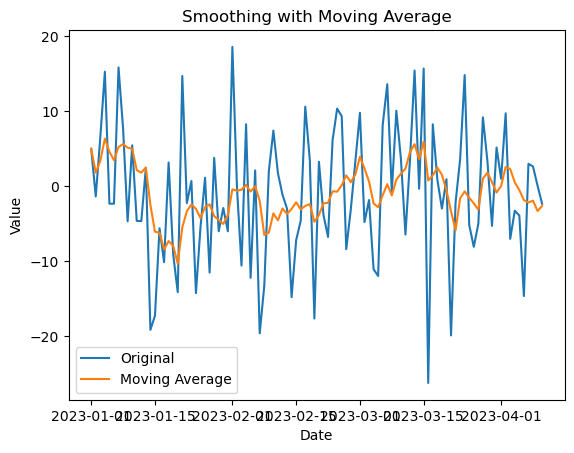

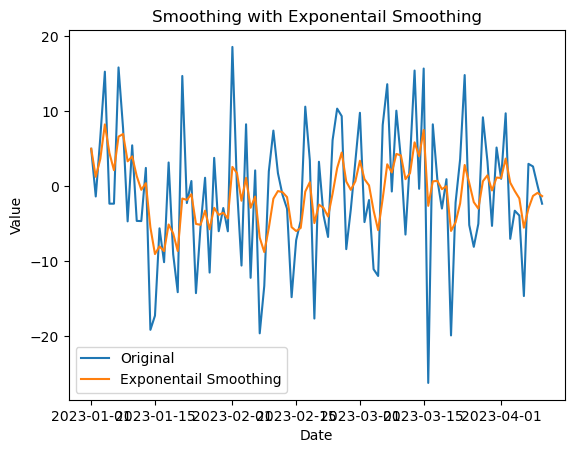

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

# 이동평균을 사용한 스무딩
window_size = 7 # 이동평균 윈도우 크기 설정

# 이동평균 계산
data['MovingAverage'] = data['Value'].rolling(window_size, min_periods = 1).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.legend()
plt.show()
# 이동 평균은 주어진 윈도우 크기 내의 관측값들의 평균을 계산하여 데이터를 부드럽게 만든다.


# 지수평활법을 사용한 스무딩
alpha = 0.3 # 지수평활법의 평화 계수 설정

# 지수평활법 계산
data['ExponentailSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentailSmoothing'], label='Exponentail Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponentail Smoothing')
plt.legend()
plt.show()
# 지수평활법은 현재 값에 높은 가중치를 주고 이전 값에는 낮은 가중치를 주어 데이터를 부드럽게 만든다.

### 트렌드
시계열 데이터에서 장기적으로 증가하거나 감소하는 패턴을 나타낸다. 데이터의 추세를 보여주며, 이를 이해하는 것은 데이터의 특성을 파악하는 데 도움이 된다.

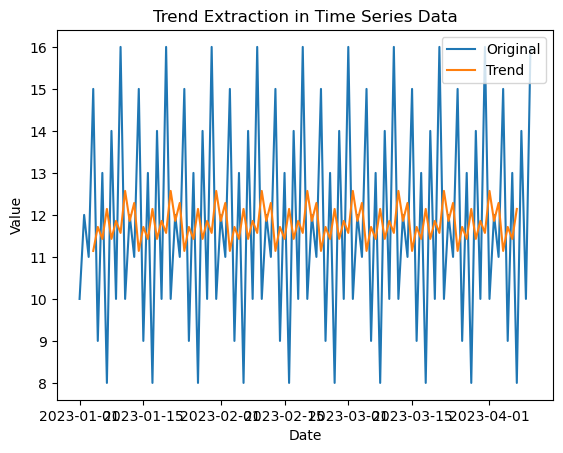

In [22]:
# 트랜드 실습 코드
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] * 10  # 시계열 데이터

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})

# 주기 설정
period = 7  # 7일 주기
# 데이터가 7일 간격으로 반복되는 패턴을 가지고 있다고 가정한 것

# 주기성 분해
result = seasonal_decompose(data['Value'], model='additive', period=period)

# 추세 계산
trend = result.trend

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend Extraction in Time Series Data')
plt.legend()
plt.show()

이상치 데이터 추가 확인 체크 >>  50.0


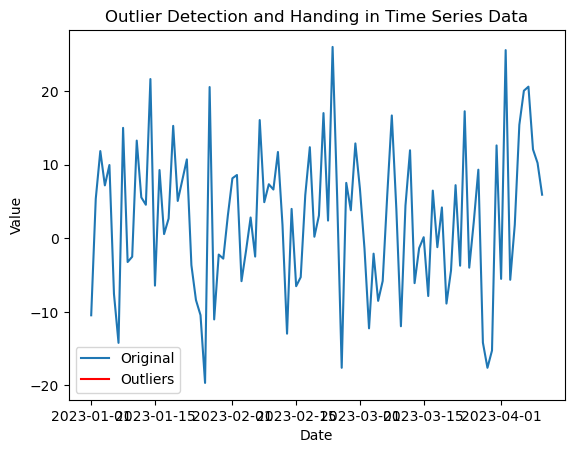

이상치 처리된 데이터 확인 >>  7.90171546799713


In [36]:
# 주어진 시계열 데이터에서 이상치 탐지 및 처리
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10   # 정규 분포를 따르는 데이터 생성

# 이상치 추가
values[20] = 50   # 이상치 추가

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})
print("이상치 데이터 추가 확인 체크 >> ", data['Value'].iloc[20])

# 이상치 참지
z_scores = np.abs(stats.zscore(data['Value']))  # Z-score 계산
threshold = 3   # 이상치 임계값 설정
outliers = z_scores > threshold   # Z-score가 임계값을 초과하는지 확인

# 이상치 처리
data.loc[outliers, 'Value'] = np.nan # 이상치를 결측치로 처리

# 결측치 보간
data['Value'] = data['Value'].interpolate()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data[outliers]['Date'], data[outliers]['Value'], color = 'red', label = 'Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handing in Time Series Data')
plt.legend()
plt.show()

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> ", data['Value'].iloc[20])